<h1><center>Students Performance Prediction Using Machine Learning</center></h1>

## Reading data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("students2.csv")
dfv = pd.read_csv("students2.csv")

## Data

**Displaying the dataset**

In [2]:
data.rename(columns={"sex":"gender"},inplace=True)
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1(10),G2(10),passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0.0,5.5,YES
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,4.5,5.5,YES
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,6.0,6.5,YES
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,7.0,7.0,YES
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,5.5,6.5,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,4.5,4.5,YES
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,7.0,8.0,YES
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,5.0,4.0,NO
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,5.5,6.0,YES


In [3]:
df = data[['gender','age','Medu','Fedu','traveltime','studytime','reason','failures','schoolsup','internet','goout','health','absences','G1(10)','G2(10)','higher','passed']]

In [4]:
df

,gender,age,Medu,Fedu,traveltime,studytime,reason,failures,schoolsup,internet,goout,health,absences,G1(10),G2(10),higher,passed
0,F,18,4,4,2,2,course,0,yes,no,4,3,4,0.0,5.5,yes,YES
1,F,17,1,1,1,2,course,0,no,yes,3,3,2,4.5,5.5,yes,YES
2,F,15,1,1,1,2,other,0,yes,yes,2,3,6,6.0,6.5,yes,YES
3,F,15,4,2,1,3,home,0,no,yes,2,5,0,7.0,7.0,yes,YES
4,F,16,3,3,1,2,home,0,no,no,2,5,0,5.5,6.5,yes,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,M,20,2,2,1,2,course,2,no,no,4,4,11,4.5,4.5,yes,YES
1040,M,17,3,1,2,1,course,0,no,yes,5,2,3,7.0,8.0,yes,YES
1041,M,21,1,1,1,1,course,3,no,no,3,3,3,5.0,4.0,yes,NO
1042,M,18,3,2,3,1,course,0,no,yes,1,5,0,5.5,6.0,yes,YES


## Data processing 

In [5]:
# mapping strings to numeric values:
def numerical_data():
    df['gender'] = df['gender'].map({'M': 0, 'F': 1})
    df['reason'] = df['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
    df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
    df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
    #df['romantic'] = df['romantic'].map({'no': 0, 'yes' : 1})
    df['passed'] = df['passed'].map({'NO': 0, 'YES': 1})
    

**digitization of values**

In [6]:
# All values in numerical after calling numerical_data() function
numerical_data()
df

,gender,age,Medu,Fedu,traveltime,studytime,reason,failures,schoolsup,internet,goout,health,absences,G1(10),G2(10),higher,passed
0,1,18,4,4,2,2,2,0,1,0,4,3,4,0.0,5.5,1,1
1,1,17,1,1,1,2,2,0,0,1,3,3,2,4.5,5.5,1,1
2,1,15,1,1,1,2,3,0,1,1,2,3,6,6.0,6.5,1,1
3,1,15,4,2,1,3,0,0,0,1,2,5,0,7.0,7.0,1,1
4,1,16,3,3,1,2,0,0,0,0,2,5,0,5.5,6.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,20,2,2,1,2,2,2,0,0,4,4,11,4.5,4.5,1,1
1040,0,17,3,1,2,1,2,0,0,1,5,2,3,7.0,8.0,1,1
1041,0,21,1,1,1,1,2,3,0,0,3,3,3,5.0,4.0,1,0
1042,0,18,3,2,3,1,2,0,0,1,1,5,0,5.5,6.0,1,1


    - Now, all the values in the dataset are numerical.

# Data visualisation  

## 1) data inspection

In [7]:
df.shape

(1044, 17)

In [8]:
df.dropna().shape # their is no null value "fortunately:)"

(1044, 17)

In [9]:
df.isnull().sum()

gender        0
age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
reason        0
failures      0
schoolsup     0
internet      0
goout         0
health        0
absences      0
G1(10)        0
G2(10)        0
higher        0
passed        0
dtype: int64

In [10]:
df.columns

Index(['gender', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'reason',
       'failures', 'schoolsup', 'internet', 'goout', 'health', 'absences',
       'G1(10)', 'G2(10)', 'higher', 'passed'],
      dtype='object')

In [11]:
features=['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']

## 2)features visualisation


In [12]:
#plot of student status
dfv['passed'].value_counts()

YES    944
NO     100
Name: passed, dtype: int64

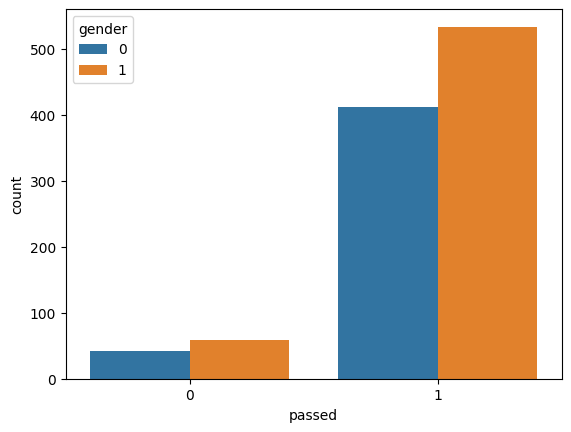

In [13]:
sns.countplot(x='passed',hue='gender',data=df);
plt.show()

Likely most of student passed the exam ,our goal is to decrease the student failure as max as possible.

 ### a)Correlation heatmap

   #### -a.1) general hetmap

Text(0.5, 1.0, 'Correlation Heatmap')

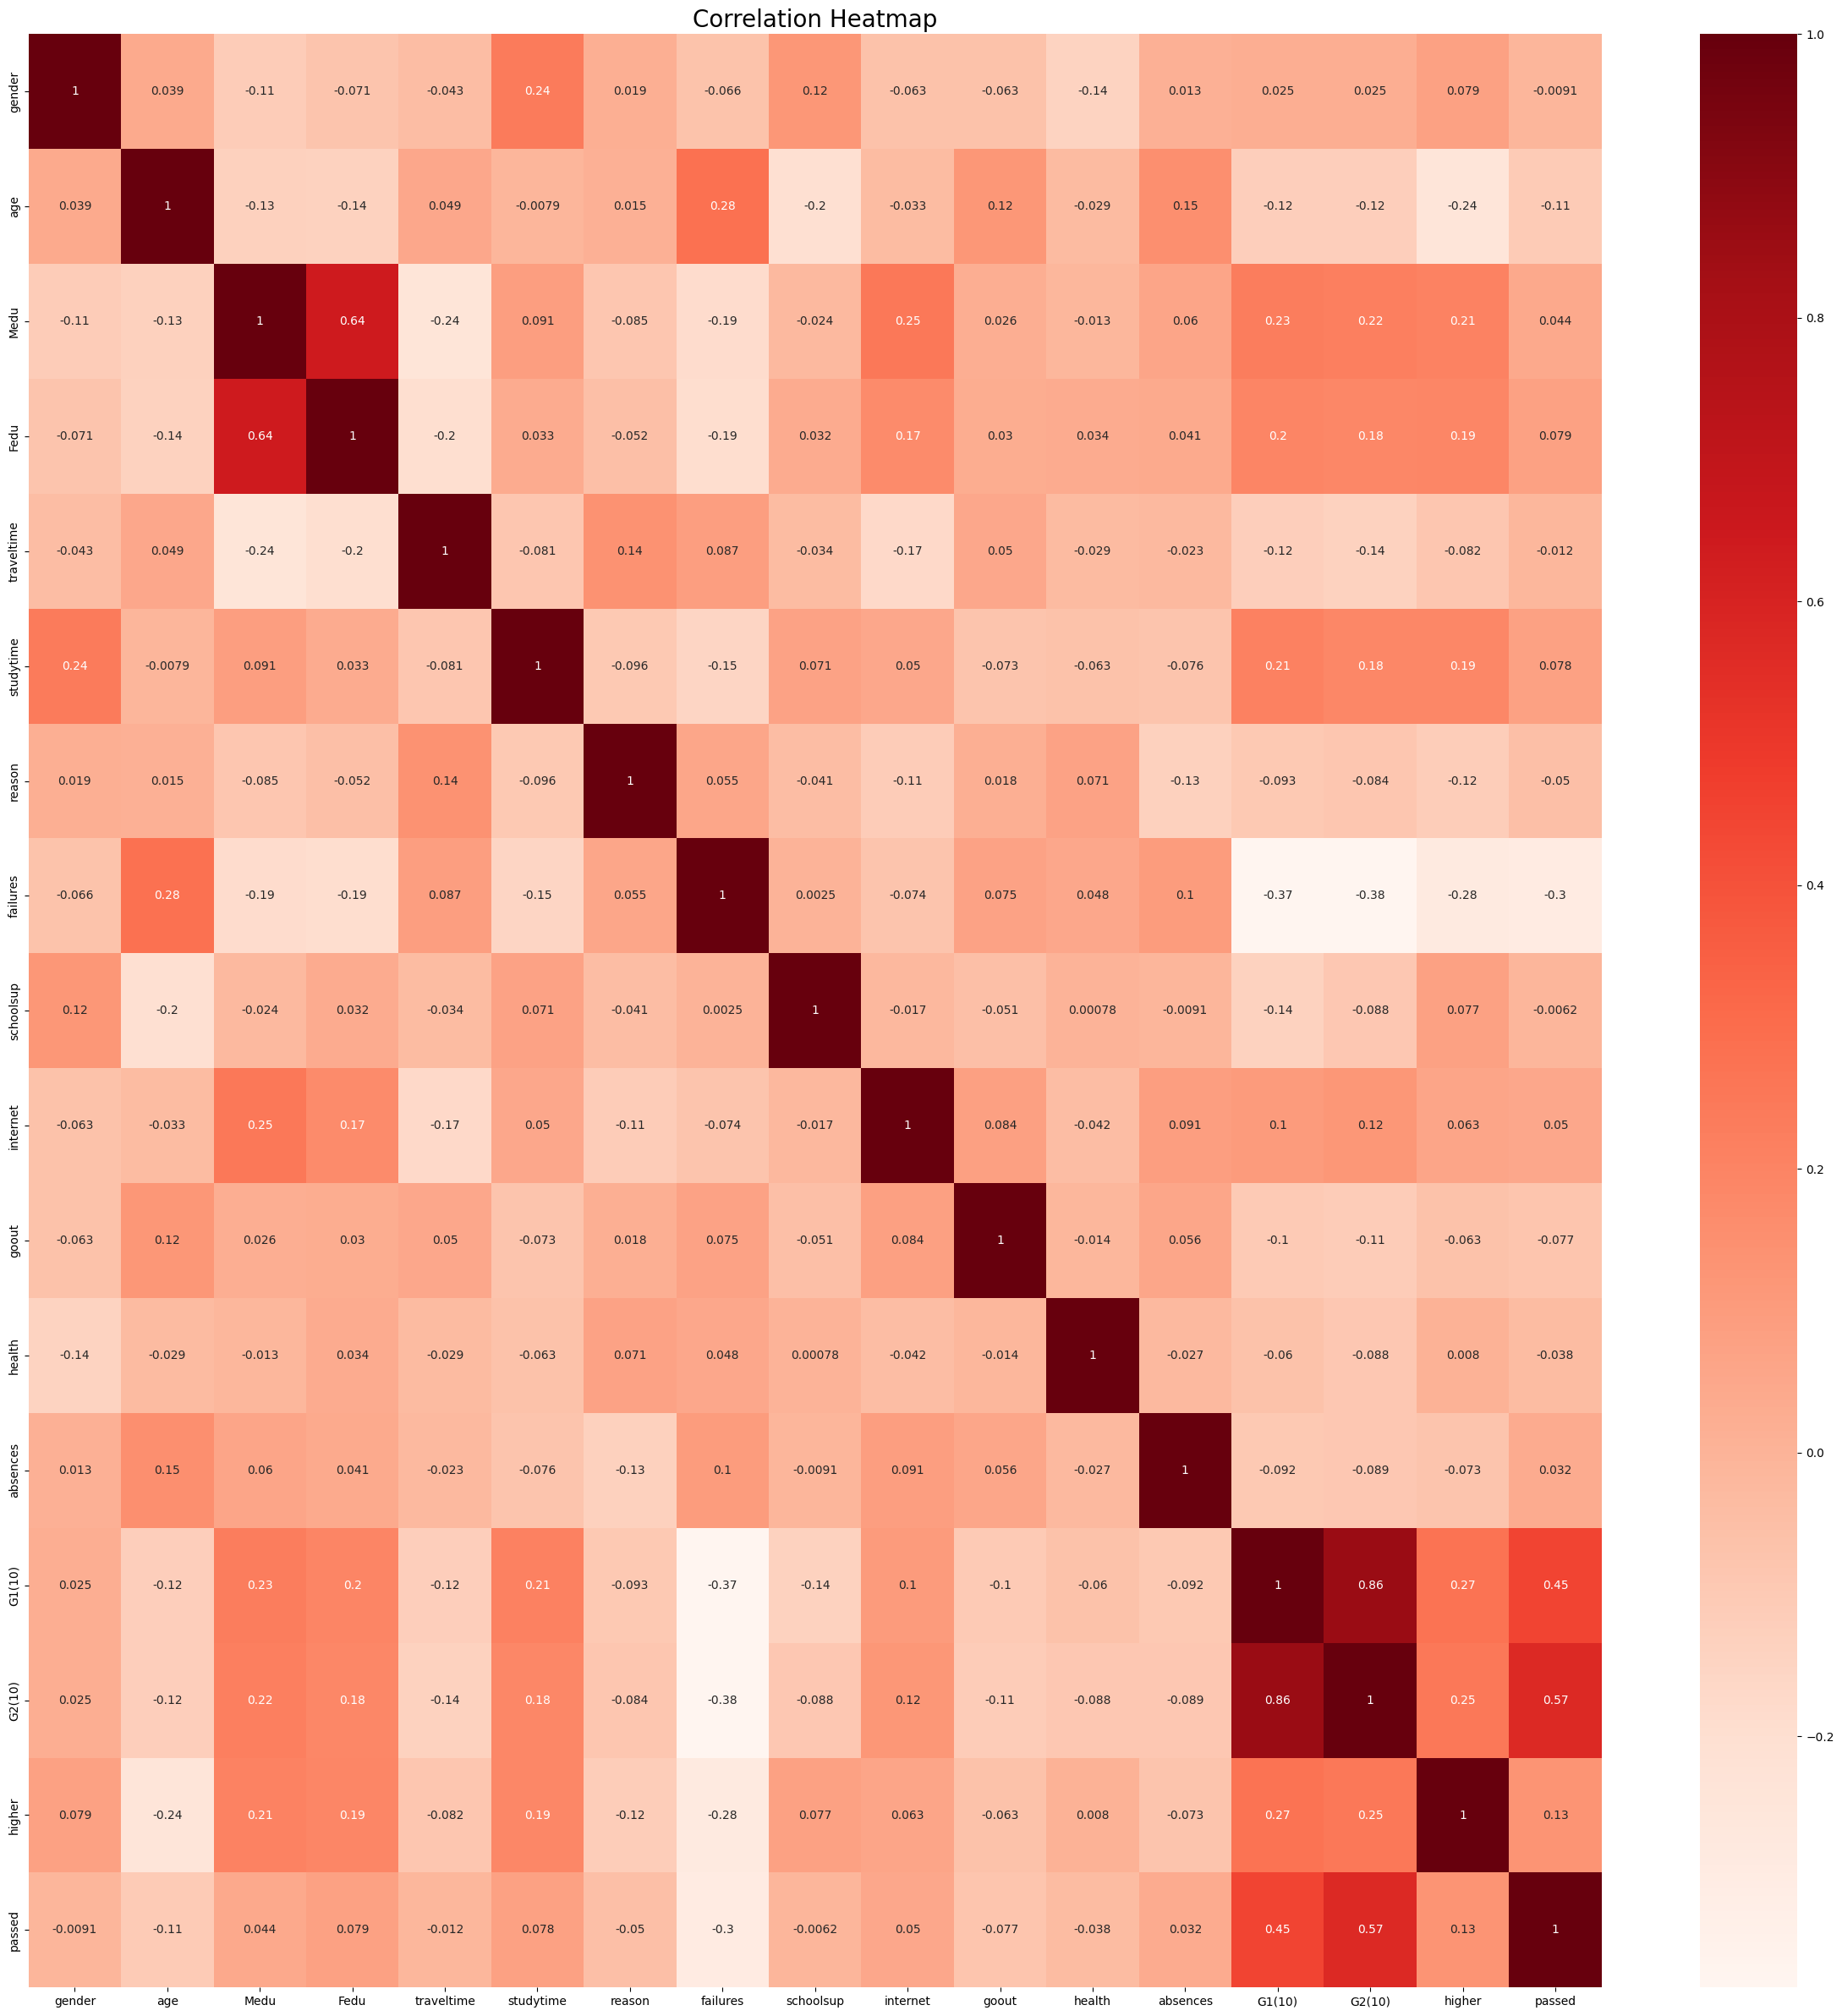

In [14]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

#### a.2)correlation between student status and other features

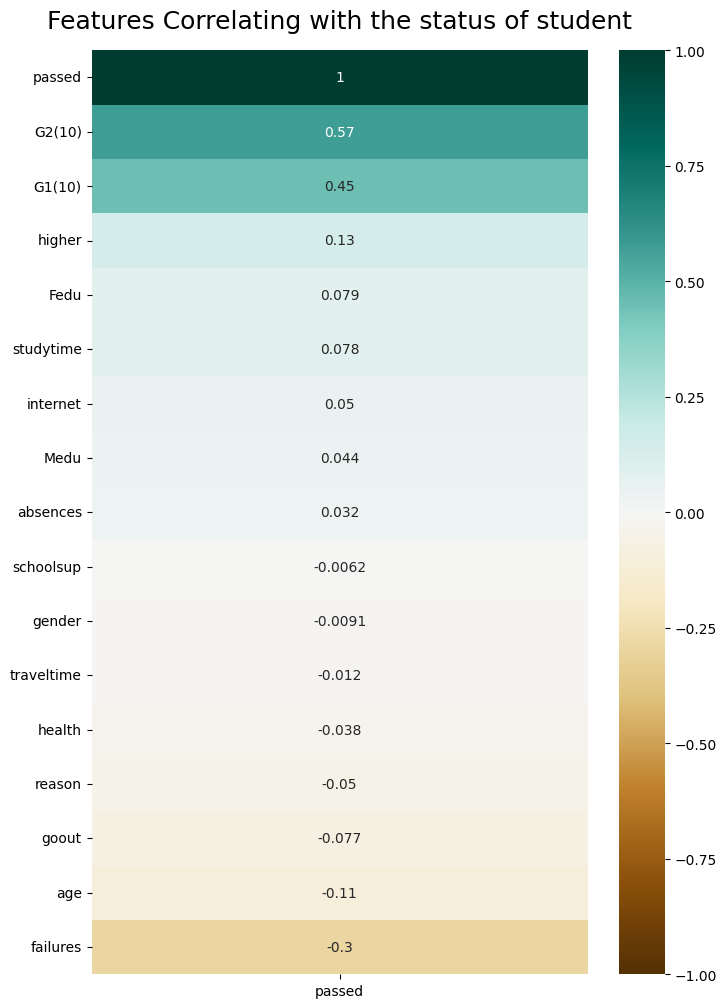

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

#### b.1) Student status  By goout

In [16]:
df["goout"].unique()

array([4, 3, 2, 1, 5], dtype=int64)

Text(0.5, 0, 'Student status')

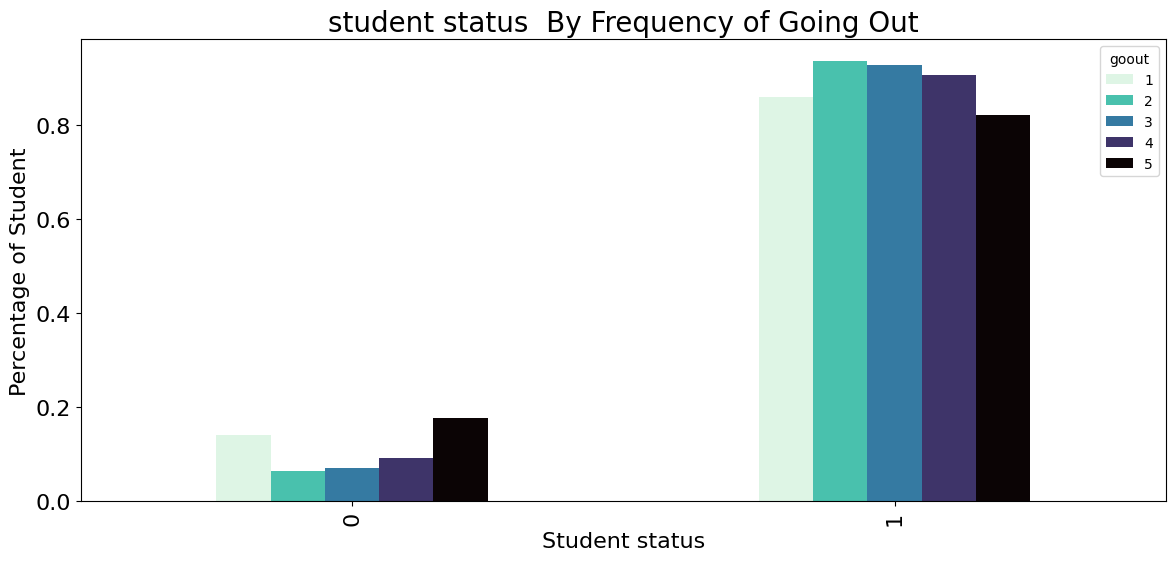

In [17]:
# going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=df.passed, columns=df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('student status  By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

-C1: it seems that most of people who passed the exam had less hour of going out ,as a conclusion we should limit the hour of going out with friend

#### b.2)Student status by  mother job and mother education:

C3:It's seems that students who's mother work as doctor reach good status

Text(0.5, 0, 'Mother Education Level')

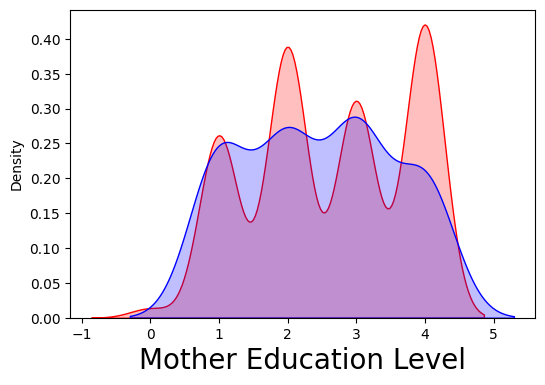

In [18]:
#Mother education:
good = df.loc[df.passed==1]
poor=df.loc[df.passed==0]
good['good_student_mother_education'] = good.Medu
poor['poor_student_mother_education'] = poor.Medu
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")#poor_student in blue
plt.xlabel('Mother Education Level', fontsize=20)

C4:Mother height education had good impact in student status.If we look into the second heatmap previousely it seems that Medu is more impactfful than Fedu sow if you are woman study hard ,if you are man marry a woman with higher education.


#### b.3)Student status by deseire to take heigher education:

Text(0, 0.5, 'Percentage of Student')

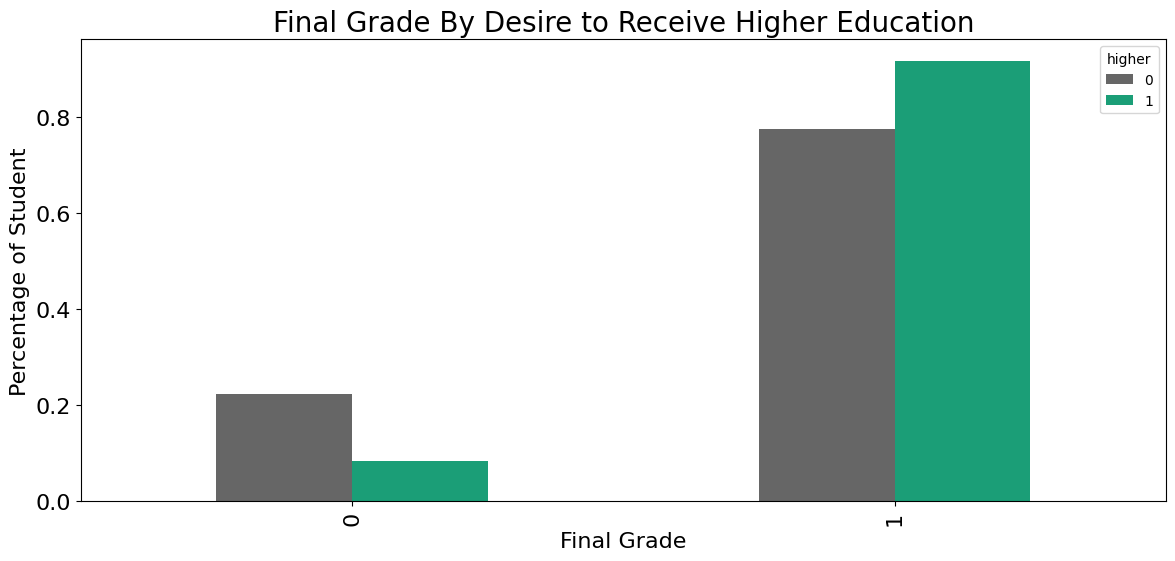

In [19]:
higher_tab = pd.crosstab(index=df.passed, columns=df.higher)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C4:Most of people who passed the exam want to take heigher education sow it could be a good idea to encourage your kids or students to take heigher education.

#### b.4)Student status by age 

Text(0, 0.5, 'Percentage of Student')

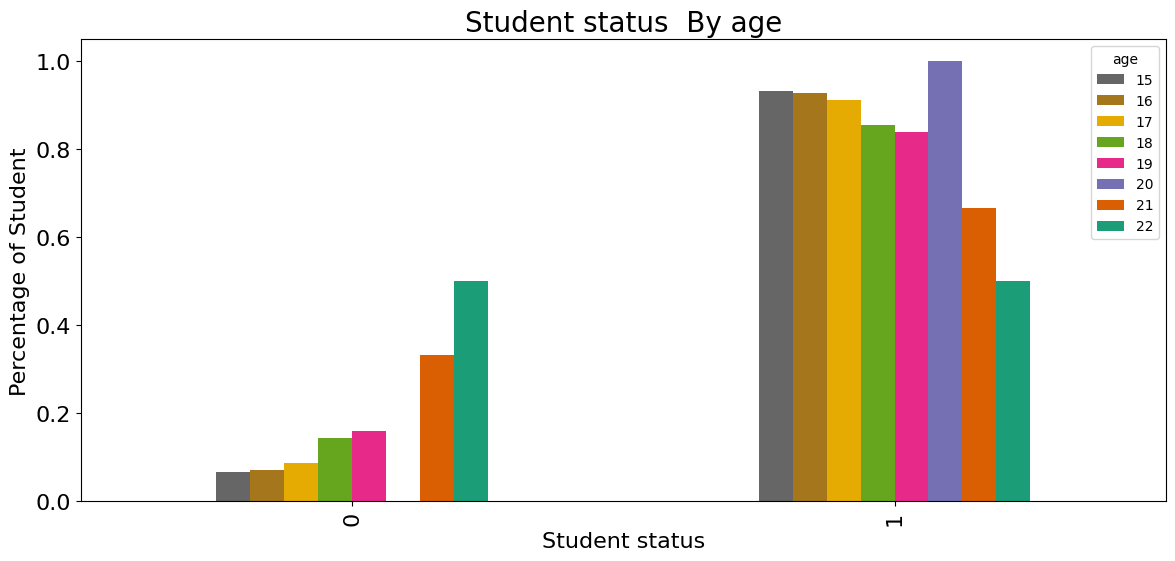

In [20]:
#impact of age
higher_tab = pd.crosstab(index=df.passed, columns=df.age)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('Student status  By age', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C5:Age also play an importent role in student sucess, most of people who passed the exam had early age 15, and most people who failed the exam had an age of 22 .As a conclusion it could be better to go to school in early age.

#### b.5) Student status by failures:

In [21]:
#impact of failures

Text(0, 0.5, 'Percentage of Student')

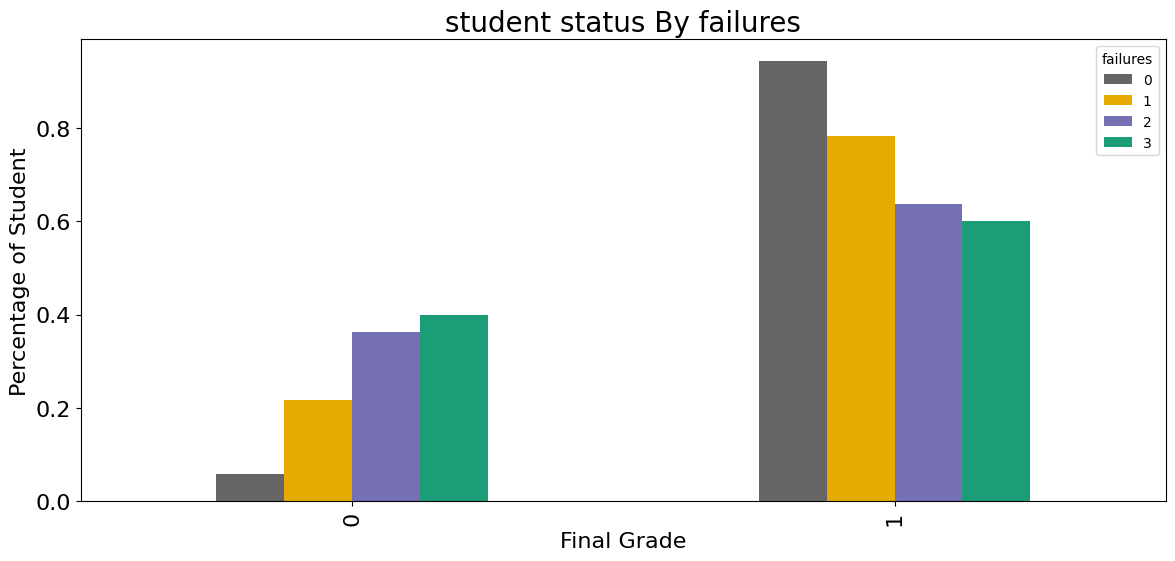

In [22]:
fail_tab = pd.crosstab(index=df.passed, columns=df.failures)
fail_perc = fail_tab.apply(perc).reindex(index)
fail_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By failures', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C6:most of people who passed the exam had 0failures sow it could be a good choice to study hard and pass all the grades

#### b.6) Student status by internet accessibility:

Text(0, 0.5, 'Percentage of Student')

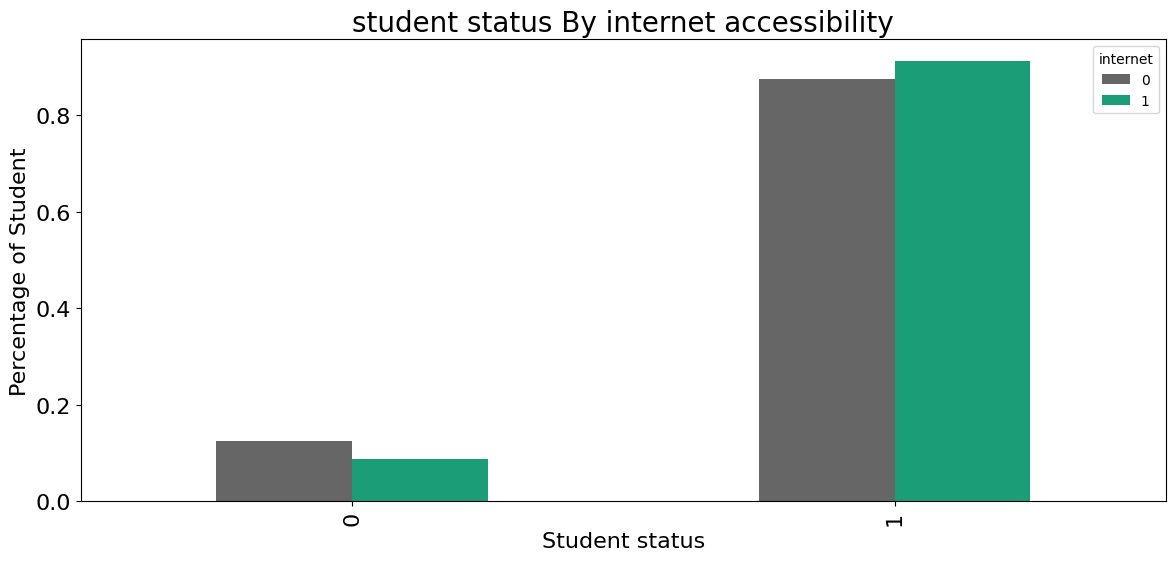

In [23]:
alc_tab = pd.crosstab(index=df.passed, columns=df.internet)
alc_perc = alc_tab.apply(perc).reindex(index)
alc_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C9:Most of people who passed the exam had the accessibility to internet ,sow we should provide a fair materials's education

#### b.7) Student status by weakly Study time :

Text(0, 0.5, 'Percentage of Student')

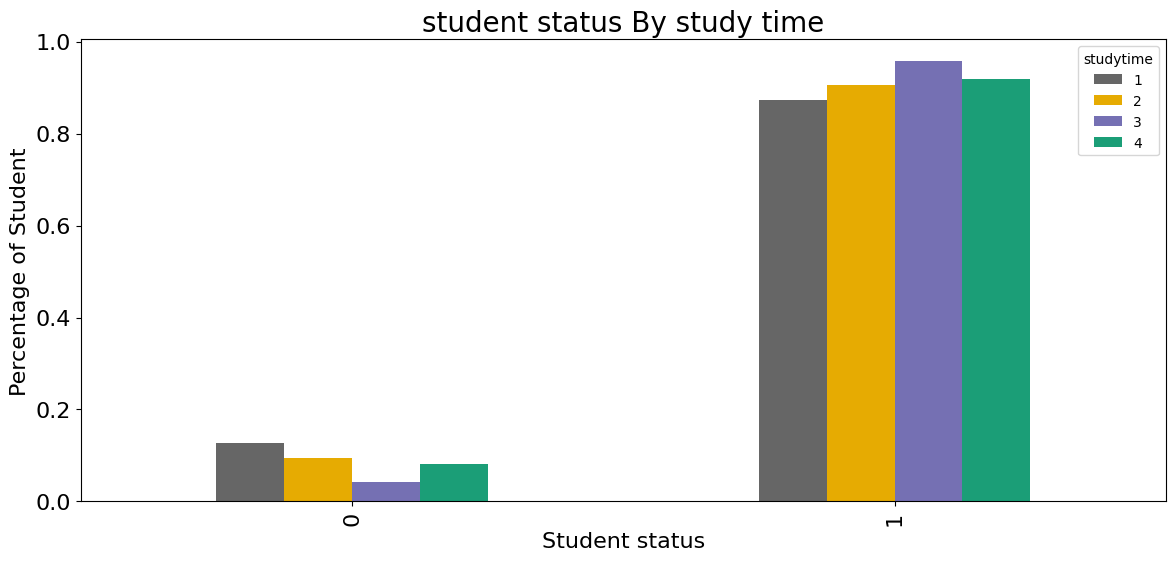

In [24]:
stu_tab = pd.crosstab(index=df.passed, columns=df.studytime)
stu_perc = stu_tab.apply(perc).reindex(index)
stu_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By study time', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C10:Most of people who passed the exam study 5-10 hours weekely

#### b.8)Student status by health:

Text(0, 0.5, 'Percentage of Student')

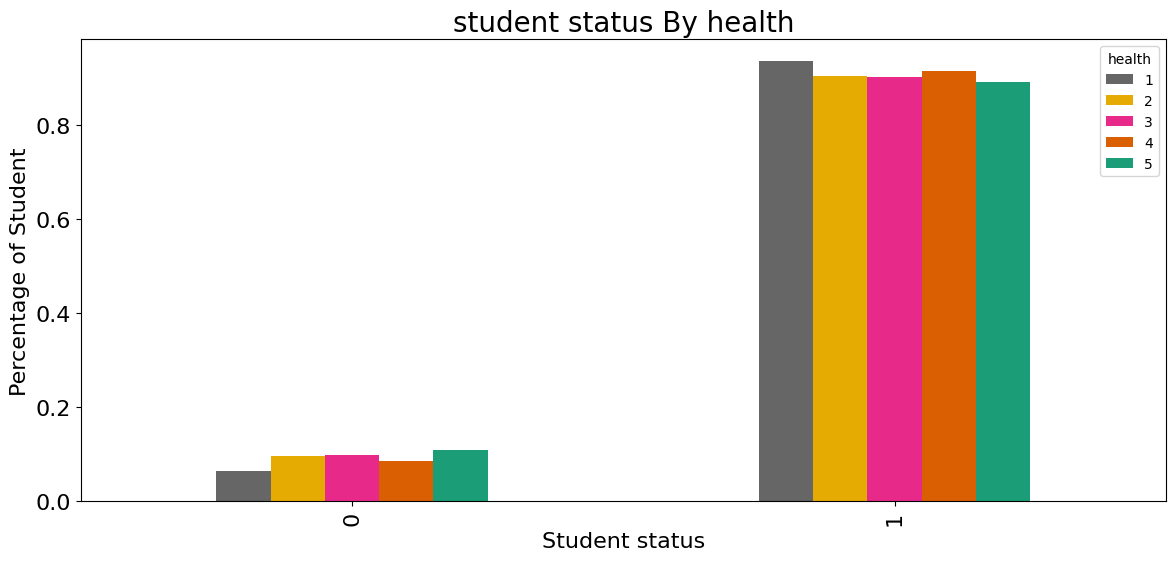

In [25]:
he_tab = pd.crosstab(index=df.passed, columns=df.health)
he_perc = he_tab.apply(perc).reindex(index)
he_perc.plot.bar(colormap="Dark2_r", figsize=(14,6), fontsize=16)
plt.title('student status By health', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)


C11:most of student who fails the exam don't have a good health

# Splitting the data for train and test

X ---train_X,test_X 70/30

Y ---train_Y,test_Y


In [26]:
X=df.drop('passed',axis=1)

In [27]:
X.head()

,gender,age,Medu,Fedu,traveltime,studytime,reason,failures,schoolsup,internet,goout,health,absences,G1(10),G2(10),higher
0,1,18,4,4,2,2,2,0,1,0,4,3,4,0.0,5.5,1
1,1,17,1,1,1,2,2,0,0,1,3,3,2,4.5,5.5,1
2,1,15,1,1,1,2,3,0,1,1,2,3,6,6.0,6.5,1
3,1,15,4,2,1,3,0,0,0,1,2,5,0,7.0,7.0,1
4,1,16,3,3,1,2,0,0,0,0,2,5,0,5.5,6.5,1


In [28]:
Y=df['passed']

In [29]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1039    1
1040    1
1041    0
1042    1
1043    1
Name: passed, Length: 1044, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [31]:
X_train

,gender,age,Medu,Fedu,traveltime,studytime,reason,failures,schoolsup,internet,goout,health,absences,G1(10),G2(10),higher
399,1,18,3,2,1,3,3,0,0,1,3,1,4,7.0,8.0,1
8,0,15,3,2,1,2,0,0,0,1,2,1,0,7.5,8.0,1
400,0,18,4,3,1,3,2,0,0,1,2,4,4,7.5,7.0,1
631,1,18,1,1,4,3,0,0,0,1,2,4,4,5.0,5.5,1
367,1,17,2,1,1,2,0,0,0,1,3,2,2,5.5,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,1,18,4,3,1,1,2,0,0,1,4,2,8,5.0,5.5,1
973,1,17,0,2,2,3,0,0,0,1,3,2,0,8.0,7.5,1
75,0,15,4,3,1,2,0,0,0,1,3,5,0,5.5,5.5,1
599,0,18,4,4,3,1,3,0,0,1,5,1,5,6.0,6.5,1


In [32]:
Y_train

399    1
8      1
400    1
631    1
367    1
      ..
575    1
973    1
75     1
599    1
863    1
Name: passed, Length: 835, dtype: int64

In [33]:
X_test

,gender,age,Medu,Fedu,traveltime,studytime,reason,failures,schoolsup,internet,goout,health,absences,G1(10),G2(10),higher
28,0,16,3,4,1,2,0,0,1,1,3,5,2,6.0,6.0,1
320,1,18,4,4,1,2,1,1,1,1,4,4,2,7.0,6.0,1
928,0,18,4,3,2,1,2,0,0,1,3,1,8,5.0,5.5,1
267,0,17,4,3,2,2,2,0,0,1,5,5,8,7.5,7.5,1
172,0,16,3,3,1,2,2,1,0,1,5,5,0,5.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,0,17,3,4,3,2,2,0,0,0,5,5,0,5.0,0.0,1
489,0,18,1,1,2,1,0,1,0,1,3,4,0,4.0,4.5,0
325,0,17,4,1,2,1,0,0,0,1,4,5,22,5.5,5.5,1
352,0,19,3,3,1,2,1,0,0,0,3,5,0,5.0,5.0,1


In [34]:
Y_test

28     1
320    1
928    1
267    1
172    0
      ..
785    0
489    1
325    1
352    1
761    1
Name: passed, Length: 209, dtype: int64

### Normalize

In [35]:
df.describe()

,gender,age,Medu,Fedu,traveltime,studytime,reason,failures,schoolsup,internet,goout,health,absences,G1(10),G2(10),higher,passed
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.566092,16.726054,2.603448,2.387931,1.522989,1.970307,1.371648,0.264368,0.113985,0.792146,3.156130,3.543103,4.434866,5.606801,5.623084,0.914751,0.904215
std,0.495850,1.239975,1.124907,1.099938,0.731727,0.834353,0.967249,0.656142,0.317945,0.405967,1.152575,1.424703,6.210017,1.491697,1.642536,0.279386,0.294438
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,4.500000,4.500000,1.000000,1.000000
50%,1.000000,17.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,3.000000,4.000000,2.000000,5.500000,5.500000,1.000000,1.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,4.000000,5.000000,6.000000,6.500000,6.500000,1.000000,1.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,1.000000,1.000000,5.000000,5.000000,75.000000,9.500000,9.500000,1.000000,1.000000


In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [37]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [38]:
import pickle
import os

In [39]:
scaler_path=os.path.join('models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [40]:
X_train_std

array([[ 0.8620992 ,  1.00716397,  0.37041528, ...,  0.94408402,
         1.47521504,  0.30249507],
       [-1.15995932, -1.39107343,  0.37041528, ...,  1.27896514,
         1.47521504,  0.30249507],
       [-1.15995932,  1.00716397,  1.25665241, ...,  1.27896514,
         0.8541893 ,  0.30249507],
       ...,
       [-1.15995932, -1.39107343,  1.25665241, ..., -0.06055934,
        -0.07734931,  0.30249507],
       [-1.15995932,  1.00716397,  1.25665241, ...,  0.27432178,
         0.54367643,  0.30249507],
       [ 0.8620992 ,  0.2077515 ,  1.25665241, ..., -1.0652027 ,
        -0.38786219,  0.30249507]])

In [41]:
X_test_std

array([[-1.15995932, -0.59166096,  0.37041528, ...,  0.27432178,
         0.23316356,  0.30249507],
       [ 0.8620992 ,  1.00716397,  1.25665241, ...,  0.94408402,
         0.23316356,  0.30249507],
       [-1.15995932,  1.00716397,  1.25665241, ..., -0.39544046,
        -0.07734931,  0.30249507],
       ...,
       [-1.15995932,  0.2077515 ,  1.25665241, ..., -0.06055934,
        -0.07734931,  0.30249507],
       [-1.15995932,  1.80657643,  0.37041528, ..., -0.39544046,
        -0.38786219,  0.30249507],
       [ 0.8620992 , -0.59166096, -0.51582185, ..., -0.39544046,
         0.54367643,  0.30249507]])

# Training

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [43]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [44]:
dt.feature_importances_

array([0.        , 0.03904547, 0.04314131, 0.01338179, 0.02315958,
       0.03206219, 0.0294333 , 0.02552083, 0.        , 0.01398098,
       0.05250191, 0.01746513, 0.02495242, 0.09150249, 0.5938526 ,
       0.        ])

In [45]:
dt.feature_importances_

array([0.        , 0.03904547, 0.04314131, 0.01338179, 0.02315958,
       0.03206219, 0.0294333 , 0.02552083, 0.        , 0.01398098,
       0.05250191, 0.01746513, 0.02495242, 0.09150249, 0.5938526 ,
       0.        ])

In [46]:
X_train.columns

Index(['gender', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'reason',
       'failures', 'schoolsup', 'internet', 'goout', 'health', 'absences',
       'G1(10)', 'G2(10)', 'higher'],
      dtype='object')

In [47]:
Y_pred=dt.predict(X_test_std)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.9330143540669856

### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [51]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [52]:
Y_pred_lr=lr.predict(X_test_std)
Y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [53]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr

0.9521531100478469

In [54]:
import joblib
model_path=os.path.join('models/lr.sav')
joblib.dump(lr,model_path)

['models/lr.sav']

### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [56]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [57]:
Y_pred=knn.predict(X_test_std)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [58]:
ac_knn=accuracy_score(Y_test,Y_pred)
ac_knn

0.9186602870813397

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [60]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [61]:
Y_pred=rf.predict(X_test_std)

In [62]:
ac_rf=accuracy_score(Y_test,Y_pred)
ac_rf

0.9617224880382775

### Support Vector Machine (SVM)

In [63]:
from sklearn.svm import SVC
sv=SVC()

In [64]:
sv.fit(X_train_std,Y_train)

SVC()

In [65]:
Y_pred=sv.predict(X_test_std)

In [66]:
ac_sv=accuracy_score(Y_test,Y_pred)
ac_sv

0.9473684210526315

### Conclusion

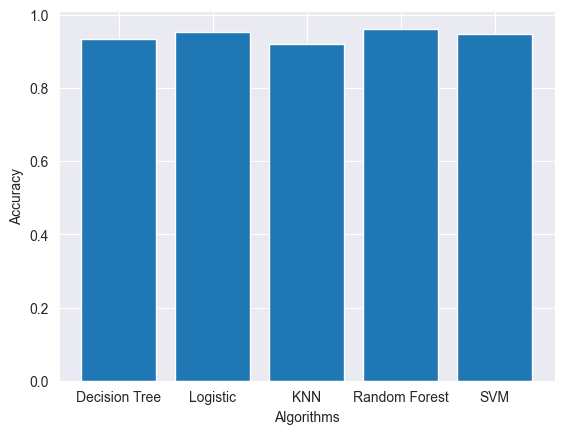

In [67]:
sns.set_style("darkgrid")
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()